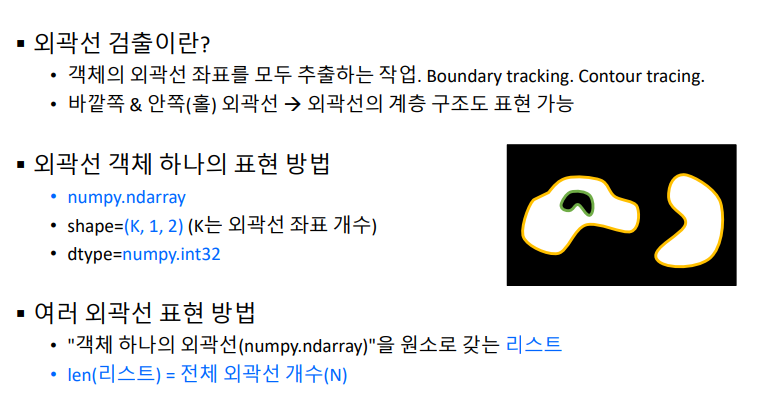
객체의 외곽선 좌표를 모두 찾아내는것이 우선입니다.  
외곽선 좌표의 shape은 (K,1,2)로 구성되며 K는 실제 외곽선 점들의 개수, 1은 더미이고, 2는 x,y 좌표가 되겠습니다.  이때 dataType는 일반적인 정수형 4Type을 사용합니다.

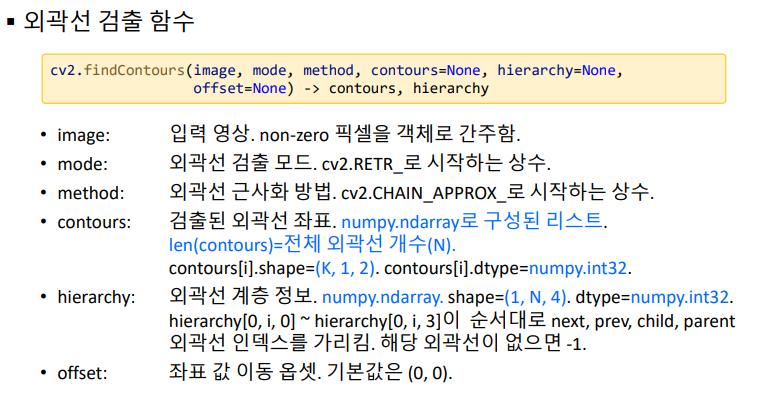
검출한 좌표를 어떻게 반환하는지 findContours 함수에 대해 알아보겠습니다.  
- image는 입력영상입니다. 흰색과 검정색으로 구성돼있습니다. 이때 흰색을 객체로 본다는것에 주의하세요.  
- mode는 아래 그림을 보세요
- method는 그냥 cv2.CHAIN_APPROX_NONE을 사용하세요
- contours는 입력보다는 출력으로 사용하니 none을 주세요
- hierarchy는 자식 또는 부모 외곽선의 인덱스를 가지고 있습니다.
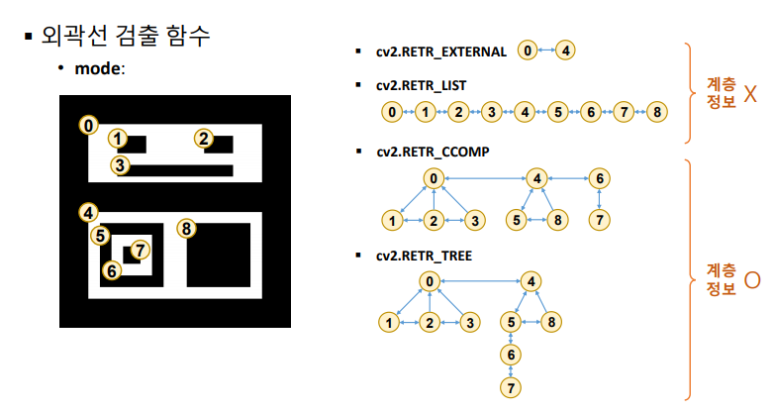
1. EXTERNAL 좌우의 배열입니다. external에 있는 외곽선만 검출합니다. 검정색과 만나는 첫번째 흰색을 검출합니다.   
2. LIST 좌우의 배열입니다. 모든 외곽선을 안쪽까지 다 찾아줍ㅂ니다.
3. CCOMP 상하 좌우입니다. 6번도 다시 최상위 레벨로 만들어줍니다. 즉, 흰색객체 외곽선은 무조건 최상위가 되는 것이죠.  
4. TREE 상하 좌우입니다. 계층구조를 만들어 주는데요. 0번밑에 1,2,3번이 있습니다. 4번밑에 5,8번이 그리고 5번밑에 6,7번이 있습니다. 

# 외곽선 그리기  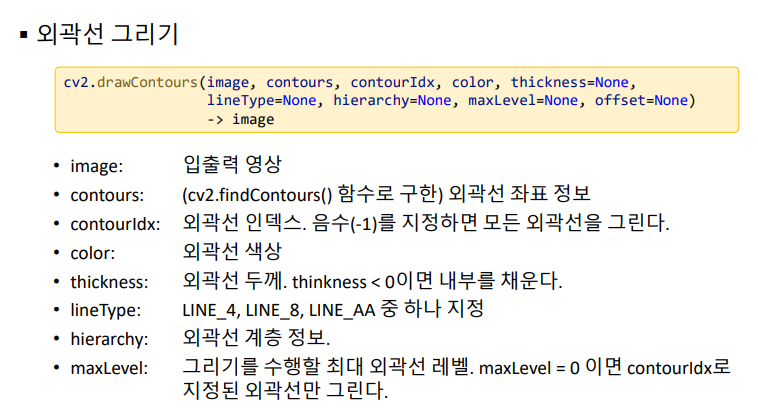
앞서 검출한 외곽선을 가지고 화면에 그리는 함수입니다.  
contourIdx에 -1을 주면 전체에 외곽선을 그려줍니다. 

In [8]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

!pip install opencv-python

In [9]:
src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)

In [10]:
if src is None:

    print('Image load failed!')

    sys.exit()

List로 계층 구조를 만듭니다.

In [11]:
contours, hier = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

출력영상은 컬러로 해야하니 변환해 줍니다.

In [12]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

첫번째 외곽선을 0번으로 지정합니다.

In [13]:
idx = 0

BGR을 랜덤하게 찾기 위해서 컬러값을 만들어 줍니다.
hier[0,idx,0] 같은경우 3번째 파라미터에 0은 next를 의미합니다.  
그러면서 idx는 점점 감소합니다.  
- hire을 안주면 가장 바깥쪽 외곽선만 그려집니다.
- hierachy는 1,N,4의 shape을 갖습니다. 

In [30]:
while idx >= 0:

    c = (random.randint(0, 255), random.randint(0, 255),random.randint(0, 255))
    cv2.drawContours(dst, contours, idx, c, 20, cv2.LINE_8,hier)
    idx = hier[0, idx, 0]

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x25d9c4949a0>)

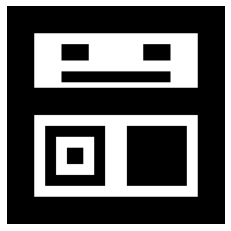

In [25]:
plt.axis('off'),plt.imshow(src,cmap='gray')

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x25d9c4ed430>)

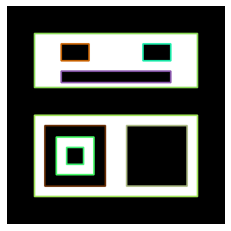

In [26]:
plt.axis('off'),plt.imshow(dst)

In [31]:
cv2.imshow('src', src)

cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

위 방법은 While 루프를 돌면서 index값을 증가시키는 방법입니다.